<a href="https://colab.research.google.com/github/sahilfaizal01/NeuroInformatics-Project/blob/main/NeuroInf_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
C_df = pd.read_csv('/content/cn-C-array.csv',header=None)
C_df.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.001439,0.005755,0.026316,0.004065,0.014925,0.009174,0.000000,0.241935,0.913669,0.900719,...,0.0,0.0,0.0,0.477698,0.001439,0.001439,0.002878,0.006878,0.002825,0.000000
1,0.000000,0.000000,0.973684,0.000000,0.000000,0.000000,0.000000,0.000000,0.081769,0.956349,...,0.0,0.0,0.0,0.953083,0.009383,0.628922,0.001340,0.930295,0.000000,0.001773
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.184211,0.973684,...,0.0,0.0,0.0,0.157895,0.473684,0.000000,0.973684,0.210526,0.552632,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.004065,0.000000,0.000000,0.000000,0.646341,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.205128,0.016129,0.014925,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.014925,0.000000,0.000000,0.000000,0.000000


In [ ]:
G_df = pd.read_csv('/content/RNA_mean_part.csv')
G_df.tail()

,Unnamed: 0,C2,C3,Dm1,Dm10,Dm11,Dm12,Dm4,Dm9,L1,...,T5b,T5c,T5d,Tm1,Tm2,Tm20,Tm3,Tm4,TmY3,TmY5a
17556,dock,0.297637,0.318537,0.523810,0.393574,0.417344,0.500873,0.400000,0.522310,0.371789,...,0.308061,0.281977,0.282732,0.337971,0.311299,0.300810,0.311564,0.349017,0.357936,0.371773
17557,kraken,0.128430,0.111506,0.333333,0.200134,0.219512,0.277487,0.316667,0.259843,0.246316,...,0.105882,0.116279,0.112903,0.146320,0.164489,0.107080,0.108748,0.111454,0.164262,0.141136
17558,CG13949,0.000381,0.000000,0.000000,0.000000,0.005420,0.000000,0.000000,0.010499,0.000421,...,0.000436,0.000000,0.000000,0.000000,0.000000,0.001057,0.000599,0.000771,0.000555,0.000000
17559,CG13950,0.000000,0.000000,0.007937,0.000000,0.002710,0.000000,0.000000,0.000000,0.000000,...,0.000436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000386,0.000000,0.000000
17560,ninaA,0.014101,0.016690,0.007937,0.012048,0.013550,0.001745,0.008333,0.018373,0.011789,...,0.016993,0.010797,0.013283,0.016607,0.014604,0.009158,0.011983,0.010413,0.018868,0.015835


In [ ]:
G_data = G_df.iloc[:,1:].values
G_data[:,0]

array([0.13567073, 0.        , 0.        , ..., 0.0003811 , 0.        ,
       0.01410061])

In [ ]:
tags = G_df.iloc[:,0].values

In [ ]:
tags

array(['Nep3', 'tRNA:Pro-CGG-1-1', 'CG9570', ..., 'CG13949', 'CG13950',
       'ninaA'], dtype=object)

In [ ]:
Gi_tags = np.core.defchararray.add('Pre_G(i)_', tags.astype(str))
Gj_tags = np.core.defchararray.add('Post_G(j)_', tags.astype(str))

In [ ]:
Gi_tags

array(['Pre_G(i)_Nep3', 'Pre_G(i)_tRNA:Pro-CGG-1-1', 'Pre_G(i)_CG9570',
       ..., 'Pre_G(i)_CG13949', 'Pre_G(i)_CG13950', 'Pre_G(i)_ninaA'],
      dtype='<U42')

In [ ]:
C_data = {}
for i in range(len(Gi_tags)):
  C_data[Gi_tags[i]] = []
  C_data[Gj_tags[i]] = []

In [ ]:
C_DataFrame = pd.DataFrame(C_data)
C_DataFrame.head()

,Pre_G(i)_Nep3,Post_G(j)_Nep3,Pre_G(i)_tRNA:Pro-CGG-1-1,Post_G(j)_tRNA:Pro-CGG-1-1,Pre_G(i)_CG9570,Post_G(j)_CG9570,Pre_G(i)_Or19b,Post_G(j)_Or19b,Pre_G(i)_CG15322,Post_G(j)_CG15322,...,Pre_G(i)_dock,Post_G(j)_dock,Pre_G(i)_kraken,Post_G(j)_kraken,Pre_G(i)_CG13949,Post_G(j)_CG13949,Pre_G(i)_CG13950,Post_G(j)_CG13950,Pre_G(i)_ninaA,Post_G(j)_ninaA


In [ ]:
len(list(C_data.keys()))

35122

In [ ]:
import pandas as pd

# Sample C-matrix representing cell connections
C_matrix = C_df
# Sample G-matrix representing gene expression
G_matrix = G_data

# Initialize an empty list to store the extracted features and target
rows = []

# Iterate over the A-matrix to find cell connections and extract gene expression features
for i in range(len(C_matrix)):
    for j in range(len(C_matrix[i])):
        if i != j and C_matrix[i][j] > 0.1:
            # Extract gene expression features for connected cells
            features_i = pd.Series(G_matrix[:, i])
            features_j = pd.Series(G_matrix[:, j])
            # Add the features and connection status to the list
            new_row = {'connect': 1}
            for k, (feature_i, feature_j) in enumerate(zip(features_i, features_j), start=1):
                new_row[f'Pre_G(i)_{k}'] = feature_i
                new_row[f'Post_G(j)_{k}'] = feature_j
            # Append the new row to the list
            rows.append(new_row)
        elif i != j:
            features_i = pd.Series(G_matrix[:, i])
            features_j = pd.Series(G_matrix[:, j])
            # Add the features and connection status to the list for non-connected cells
            new_row = {'connect': 0}
            for k, (feature_i, feature_j) in enumerate(zip(features_i, features_j), start=1):
                new_row[f'Pre_G(i)_{k}'] = feature_i
                new_row[f'Post_G(j)_{k}'] = feature_j
            # Append the new row to the list
            rows.append(new_row)

# Create a DataFrame from the list of dictionaries
C_DataFrame = pd.DataFrame(rows)

# Print the DataFrame
print(C_DataFrame)


      connect  Pre_G(i)_1  Post_G(j)_1  Pre_G(i)_2  Post_G(j)_2  Pre_G(i)_3  \
0           0    0.135671     0.178622         0.0          0.0    0.000000   
1           0    0.135671     0.476190         0.0          0.0    0.000000   
2           0    0.135671     0.205489         0.0          0.0    0.000000   
3           0    0.135671     0.273713         0.0          0.0    0.000000   
4           0    0.135671     0.397906         0.0          0.0    0.000000   
...       ...         ...          ...         ...          ...         ...   
1477        0    0.193115     0.121829         0.0          0.0    0.000344   
1478        0    0.193115     0.160268         0.0          0.0    0.000344   
1479        1    0.193115     0.122828         0.0          0.0    0.000344   
1480        1    0.193115     0.170845         0.0          0.0    0.000344   
1481        1    0.193115     0.167037         0.0          0.0    0.000344   

      Post_G(j)_3  Pre_G(i)_4  Post_G(j)_4  Pre_G(i

In [ ]:
C_DataFrame.columns = ['connect'] + list(C_data.keys())

In [ ]:
X = C_DataFrame.iloc[:,1:]
X

,Pre_G(i)_Nep3,Post_G(j)_Nep3,Pre_G(i)_tRNA:Pro-CGG-1-1,Post_G(j)_tRNA:Pro-CGG-1-1,Pre_G(i)_CG9570,Post_G(j)_CG9570,Pre_G(i)_Or19b,Post_G(j)_Or19b,Pre_G(i)_CG15322,Post_G(j)_CG15322,...,Pre_G(i)_dock,Post_G(j)_dock,Pre_G(i)_kraken,Post_G(j)_kraken,Pre_G(i)_CG13949,Post_G(j)_CG13949,Pre_G(i)_CG13950,Post_G(j)_CG13950,Pre_G(i)_ninaA,Post_G(j)_ninaA
0,0.135671,0.178622,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,0.020241,...,0.297637,0.318537,0.128430,0.111506,0.000381,0.000000,0.0,0.000000,0.014101,0.016690
1,0.135671,0.476190,0.0,0.0,0.000000,0.007937,0.0,0.0000,0.025534,0.023810,...,0.297637,0.523810,0.128430,0.333333,0.000381,0.000000,0.0,0.007937,0.014101,0.007937
2,0.135671,0.205489,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,0.024766,...,0.297637,0.393574,0.128430,0.200134,0.000381,0.000000,0.0,0.000000,0.014101,0.012048
3,0.135671,0.273713,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,0.018970,...,0.297637,0.417344,0.128430,0.219512,0.000381,0.005420,0.0,0.002710,0.014101,0.013550
4,0.135671,0.397906,0.0,0.0,0.000000,0.001745,0.0,0.0000,0.025534,0.024433,...,0.297637,0.500873,0.128430,0.277487,0.000381,0.000000,0.0,0.000000,0.014101,0.001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0.193115,0.121829,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,0.019600,...,0.371773,0.311299,0.141136,0.164489,0.000000,0.000000,0.0,0.000000,0.015835,0.014604
1478,0.193115,0.160268,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,0.016203,...,0.371773,0.300810,0.141136,0.107080,0.000000,0.001057,0.0,0.000000,0.015835,0.009158
1479,0.193115,0.122828,0.0,0.0,0.000344,0.000000,0.0,0.0003,0.023752,0.025464,...,0.371773,0.311564,0.141136,0.108748,0.000000,0.000599,0.0,0.000000,0.015835,0.011983
1480,0.193115,0.170845,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,0.023139,...,0.371773,0.349017,0.141136,0.111454,0.000000,0.000771,0.0,0.000386,0.015835,0.010413


In [ ]:
y = C_DataFrame['connect']

# **SPLITTING THE DATASET**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# **Univariate Analysis**

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn import svm
import numpy as np

# Define a range of values for k
k_values = range(1, 101)  # Example: from 1 to 10

# Define your machine learning model
model = svm.SVC(kernel='poly',class_weight='balanced',probability=True)

# Choose an evaluation metric (e.g., accuracy)
scoring = 'f1'

# Perform k-fold cross-validation for each value of k
cv_scores = []
for k in k_values:
    # Select k best features
    selector = SelectKBest(score_func=f_classif, k=k)
    X_new = selector.fit_transform(X_train, y_train)

    # Evaluate the model using cross-validation
    scores = cross_val_score(model, X_new, y_train, cv=5, scoring=scoring)
    cv_scores.append(np.mean(scores))

# Find the best value of k
best_k = k_values[np.argmax(cv_scores)]
best_score = cv_scores[np.argmax(cv_scores)]

print("Best value of k:", best_k)
print("Cross-validated", scoring, "score with best k:", best_score)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    2     3    10 ... 35099 35104 35105] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    2     3    10 ... 35099 35104 35105] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    2     3    10 ... 35099 35104 35105] 

Best value of k: 23
Cross-validated f1 score with best k: 0.41675736545351566


In [ ]:
X.columns

Index(['Pre_G(i)_1', 'Post_G(j)_1', 'Pre_G(i)_2', 'Post_G(j)_2', 'Pre_G(i)_3',
       'Post_G(j)_3', 'Pre_G(i)_4', 'Post_G(j)_4', 'Pre_G(i)_5', 'Post_G(j)_5',
       ...
       'Pre_G(i)_17557', 'Post_G(j)_17557', 'Pre_G(i)_17558',
       'Post_G(j)_17558', 'Pre_G(i)_17559', 'Post_G(j)_17559',
       'Pre_G(i)_17560', 'Post_G(j)_17560', 'Pre_G(i)_17561',
       'Post_G(j)_17561'],
      dtype='object', length=35122)

In [ ]:
k = 23  # Adjust this value as needed

# Perform univariate feature selection
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Print selected feature indices
print("Selected feature indices:", selected_indices)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [    2     3    10 ... 35099 35104 35105] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Selected feature indices: [ 1199  2201  2765  4367  8011  9811 13575 14139 14391 15945 16955 16995
 18117 18497 20783 23635 25955 30071 30309 30599 33307 33913 34767]


In [ ]:
univar_selected_features = [feature_names[i] for i in selected_indices]
print("Selected features with non-zero importance:", univar_selected_features)

Selected features with non-zero importance: ['Post_G(j)_ND-39', 'Post_G(j)_CG14015', 'Post_G(j)_mon2', 'Post_G(j)_Socs36E', 'Post_G(j)_CG13855', 'Post_G(j)_5-HT7', 'Post_G(j)_Mef2', 'Post_G(j)_Gdap2', 'Post_G(j)_Sox102F', 'Post_G(j)_nrv2', 'Post_G(j)_CG31007', 'Post_G(j)_Octbeta1R', 'Post_G(j)_CG34171', 'Post_G(j)_sif', 'Post_G(j)_Rbp', 'Post_G(j)_Mhc', 'Post_G(j)_AstA-R1', 'Post_G(j)_Ptp10D', 'Post_G(j)_mew', 'Post_G(j)_Rab3-GEF', 'Post_G(j)_CG16711', 'Post_G(j)_CG10077', 'Post_G(j)_Syt1']


In [ ]:
len(univar_selected_features)

23

# **Decision Trees Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X, y)

# Get feature importances from the trained classifier
importances = clf.feature_importances_

# Get feature names
feature_names = list(C_data.keys())

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

In [ ]:
# Filter features with non-zero importance
selected_features_indices = np.where(importances > 0)[0]
selected_features = [feature_names[i] for i in selected_features_indices]

# Print selected features
print("Selected features with non-zero importance:", selected_features)

Selected features with non-zero importance: ['Pre_G(i)_CG11436', 'Pre_G(i)_aru', 'Pre_G(i)_RpI135', 'Post_G(j)_CG11562', 'Pre_G(i)_CG13694', 'Pre_G(i)_l(2)gl', 'Post_G(j)_CG11399', 'Pre_G(i)_CG9389', 'Post_G(j)_CG9391', 'Post_G(j)_CG32448', 'Pre_G(i)_CG14561', 'Post_G(j)_CG32457', 'Pre_G(i)_Rpn5', 'Pre_G(i)_CG9766', 'Post_G(j)_CG5171', 'Post_G(j)_santa-maria', 'Post_G(j)_cdc14', 'Post_G(j)_TwdlE', 'Pre_G(i)_CG14535', 'Post_G(j)_CG7781', 'Post_G(j)_CG31875', 'Pre_G(i)_trk', 'Pre_G(i)_AstC', 'Pre_G(i)_CCT4', 'Pre_G(i)_CG7968', 'Pre_G(i)_Syx5', 'Post_G(j)_CG31806', 'Post_G(j)_l(2)37Cc', 'Post_G(j)_lok', 'Pre_G(i)_RtGEF', 'Pre_G(i)_CG9265', 'Pre_G(i)_Osi20', 'Post_G(j)_CG8379', 'Pre_G(i)_CG8420', 'Pre_G(i)_Unc-115a', 'Pre_G(i)_CG6254', 'Pre_G(i)_Ugt302K1', 'Pre_G(i)_Dnali1', 'Post_G(j)_CG5196', 'Pre_G(i)_CG6753', 'Pre_G(i)_CG3061', 'Post_G(j)_Rbf2', 'Post_G(j)_CG14903', 'Post_G(j)_CG7156', 'Post_G(j)_CG5697', 'Pre_G(i)_CG5346', 'Post_G(j)_wda', 'Pre_G(i)_CG10182', 'Post_G(j)_Pli', 'Post_G(

In [ ]:
len(selected_features)

192

In [ ]:
C_DataFrame

,connect,Pre_G(i)_Nep3,Post_G(j)_Nep3,Pre_G(i)_tRNA:Pro-CGG-1-1,Post_G(j)_tRNA:Pro-CGG-1-1,Pre_G(i)_CG9570,Post_G(j)_CG9570,Pre_G(i)_Or19b,Post_G(j)_Or19b,Pre_G(i)_CG15322,...,Pre_G(i)_dock,Post_G(j)_dock,Pre_G(i)_kraken,Post_G(j)_kraken,Pre_G(i)_CG13949,Post_G(j)_CG13949,Pre_G(i)_CG13950,Post_G(j)_CG13950,Pre_G(i)_ninaA,Post_G(j)_ninaA
0,0,0.135671,0.178622,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,...,0.297637,0.318537,0.128430,0.111506,0.000381,0.000000,0.0,0.000000,0.014101,0.016690
1,0,0.135671,0.476190,0.0,0.0,0.000000,0.007937,0.0,0.0000,0.025534,...,0.297637,0.523810,0.128430,0.333333,0.000381,0.000000,0.0,0.007937,0.014101,0.007937
2,0,0.135671,0.205489,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,...,0.297637,0.393574,0.128430,0.200134,0.000381,0.000000,0.0,0.000000,0.014101,0.012048
3,0,0.135671,0.273713,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.025534,...,0.297637,0.417344,0.128430,0.219512,0.000381,0.005420,0.0,0.002710,0.014101,0.013550
4,0,0.135671,0.397906,0.0,0.0,0.000000,0.001745,0.0,0.0000,0.025534,...,0.297637,0.500873,0.128430,0.277487,0.000381,0.000000,0.0,0.000000,0.014101,0.001745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1477,0,0.193115,0.121829,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,...,0.371773,0.311299,0.141136,0.164489,0.000000,0.000000,0.0,0.000000,0.015835,0.014604
1478,0,0.193115,0.160268,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,...,0.371773,0.300810,0.141136,0.107080,0.000000,0.001057,0.0,0.000000,0.015835,0.009158
1479,1,0.193115,0.122828,0.0,0.0,0.000344,0.000000,0.0,0.0003,0.023752,...,0.371773,0.311564,0.141136,0.108748,0.000000,0.000599,0.0,0.000000,0.015835,0.011983
1480,1,0.193115,0.170845,0.0,0.0,0.000344,0.000000,0.0,0.0000,0.023752,...,0.371773,0.349017,0.141136,0.111454,0.000000,0.000771,0.0,0.000386,0.015835,0.010413


In [ ]:
'connect' in selected_features

True

In [ ]:
univar_selected_features.append('connect')

# **Creating data subsets using DT and Univar Selected Features**

In [ ]:
subset_dt_data = C_DataFrame[selected_features]
subset_univar_data = C_DataFrame[univar_selected_features]

In [ ]:
subset_dt_data.shape

(1482, 193)

In [ ]:
subset_univar_data.shape

(1482, 24)

In [ ]:
subset_univar_data.columns

Index(['Post_G(j)_ND-39', 'Post_G(j)_CG14015', 'Post_G(j)_mon2',
       'Post_G(j)_Socs36E', 'Post_G(j)_CG13855', 'Post_G(j)_5-HT7',
       'Post_G(j)_Mef2', 'Post_G(j)_Gdap2', 'Post_G(j)_Sox102F',
       'Post_G(j)_nrv2', 'Post_G(j)_CG31007', 'Post_G(j)_Octbeta1R',
       'Post_G(j)_CG34171', 'Post_G(j)_sif', 'Post_G(j)_Rbp', 'Post_G(j)_Mhc',
       'Post_G(j)_AstA-R1', 'Post_G(j)_Ptp10D', 'Post_G(j)_mew',
       'Post_G(j)_Rab3-GEF', 'Post_G(j)_CG16711', 'Post_G(j)_CG10077',
       'Post_G(j)_Syt1', 'connect'],
      dtype='object')

# **Training models using the selected features**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(subset_dt_data.iloc[:,:-1], subset_dt_data.iloc[:,-1], test_size=0.20, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVM-Linear': svm.SVC(kernel='linear',class_weight='balanced',probability=True),
    'SVM-Poly': svm.SVC(kernel='poly',class_weight='balanced',probability=True)
}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_accuracy = clf.score(X_train, y_train)
    print(f"{name} Train Accuracy: {train_accuracy*100:.2f}")
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy*100)
    precision = precision_score(y_test, y_pred)
    print("Test Precision:", precision*100)
    recall = recall_score(y_test, y_pred)
    print("Test Recall:", recall*100)
    f1Score = f1_score(y_test, y_pred)
    print("Test F1_Score:", f1Score*100)
    print()

Training Random Forest...
Random Forest Train Accuracy: 100.00
Test Accuracy: 81.81818181818183
Test Precision: 38.88888888888889
Test Recall: 14.000000000000002
Test F1_Score: 20.588235294117645

Training Decision Tree...
Decision Tree Train Accuracy: 100.00
Test Accuracy: 81.81818181818183
Test Precision: 45.65217391304348
Test Recall: 42.0
Test F1_Score: 43.74999999999999

Training Gradient Boosting...
Gradient Boosting Train Accuracy: 94.60
Test Accuracy: 82.49158249158249
Test Precision: 45.0
Test Recall: 18.0
Test F1_Score: 25.71428571428572

Training XGBoost...
XGBoost Train Accuracy: 100.00
Test Accuracy: 84.84848484848484
Test Precision: 61.904761904761905
Test Recall: 26.0
Test F1_Score: 36.61971830985916

Training SVM-Linear...
SVM-Linear Train Accuracy: 67.26
Test Accuracy: 67.67676767676768
Test Precision: 29.09090909090909
Test Recall: 64.0
Test F1_Score: 40.0

Training SVM-Poly...
SVM-Poly Train Accuracy: 67.51
Test Accuracy: 68.01346801346801
Test Precision: 30.43478260

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(subset_univar_data.iloc[:,:-1], subset_univar_data.iloc[:,-1], test_size=0.20, random_state=42)

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'SVM-Linear': svm.SVC(kernel='linear',class_weight='balanced',probability=True),
    'SVM-Poly': svm.SVC(kernel='poly',class_weight='balanced',probability=True)
}

for name, clf in classifiers.items():
    print(f"Training {name}...")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    train_accuracy = clf.score(X_train, y_train)
    print(f"{name} Train Accuracy: {train_accuracy*100:.2f}")
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Test Accuracy:", test_accuracy*100)
    precision = precision_score(y_test, y_pred)
    print("Test Precision:", precision*100)
    recall = recall_score(y_test, y_pred)
    print("Test Recall:", recall*100)
    f1Score = f1_score(y_test, y_pred)
    print("Test F1_Score:", f1Score*100)
    print()

Training Random Forest...
Random Forest Train Accuracy: 85.82
Test Accuracy: 83.16498316498317
Test Precision: 0.0
Test Recall: 0.0
Test F1_Score: 0.0

Training Decision Tree...
Decision Tree Train Accuracy: 85.82
Test Accuracy: 83.16498316498317
Test Precision: 0.0
Test Recall: 0.0
Test F1_Score: 0.0

Training Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting Train Accuracy: 85.82
Test Accuracy: 83.16498316498317
Test Precision: 0.0
Test Recall: 0.0
Test F1_Score: 0.0

Training XGBoost...
XGBoost Train Accuracy: 85.82
Test Accuracy: 83.16498316498317
Test Precision: 0.0
Test Recall: 0.0
Test F1_Score: 0.0

Training SVM-Linear...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM-Linear Train Accuracy: 65.32
Test Accuracy: 63.97306397306397
Test Precision: 26.82926829268293
Test Recall: 66.0
Test F1_Score: 38.150289017341045

Training SVM-Poly...
SVM-Poly Train Accuracy: 67.59
Test Accuracy: 66.32996632996633
Test Precision: 28.448275862068968
Test Recall: 66.0
Test F1_Score: 39.75903614457831



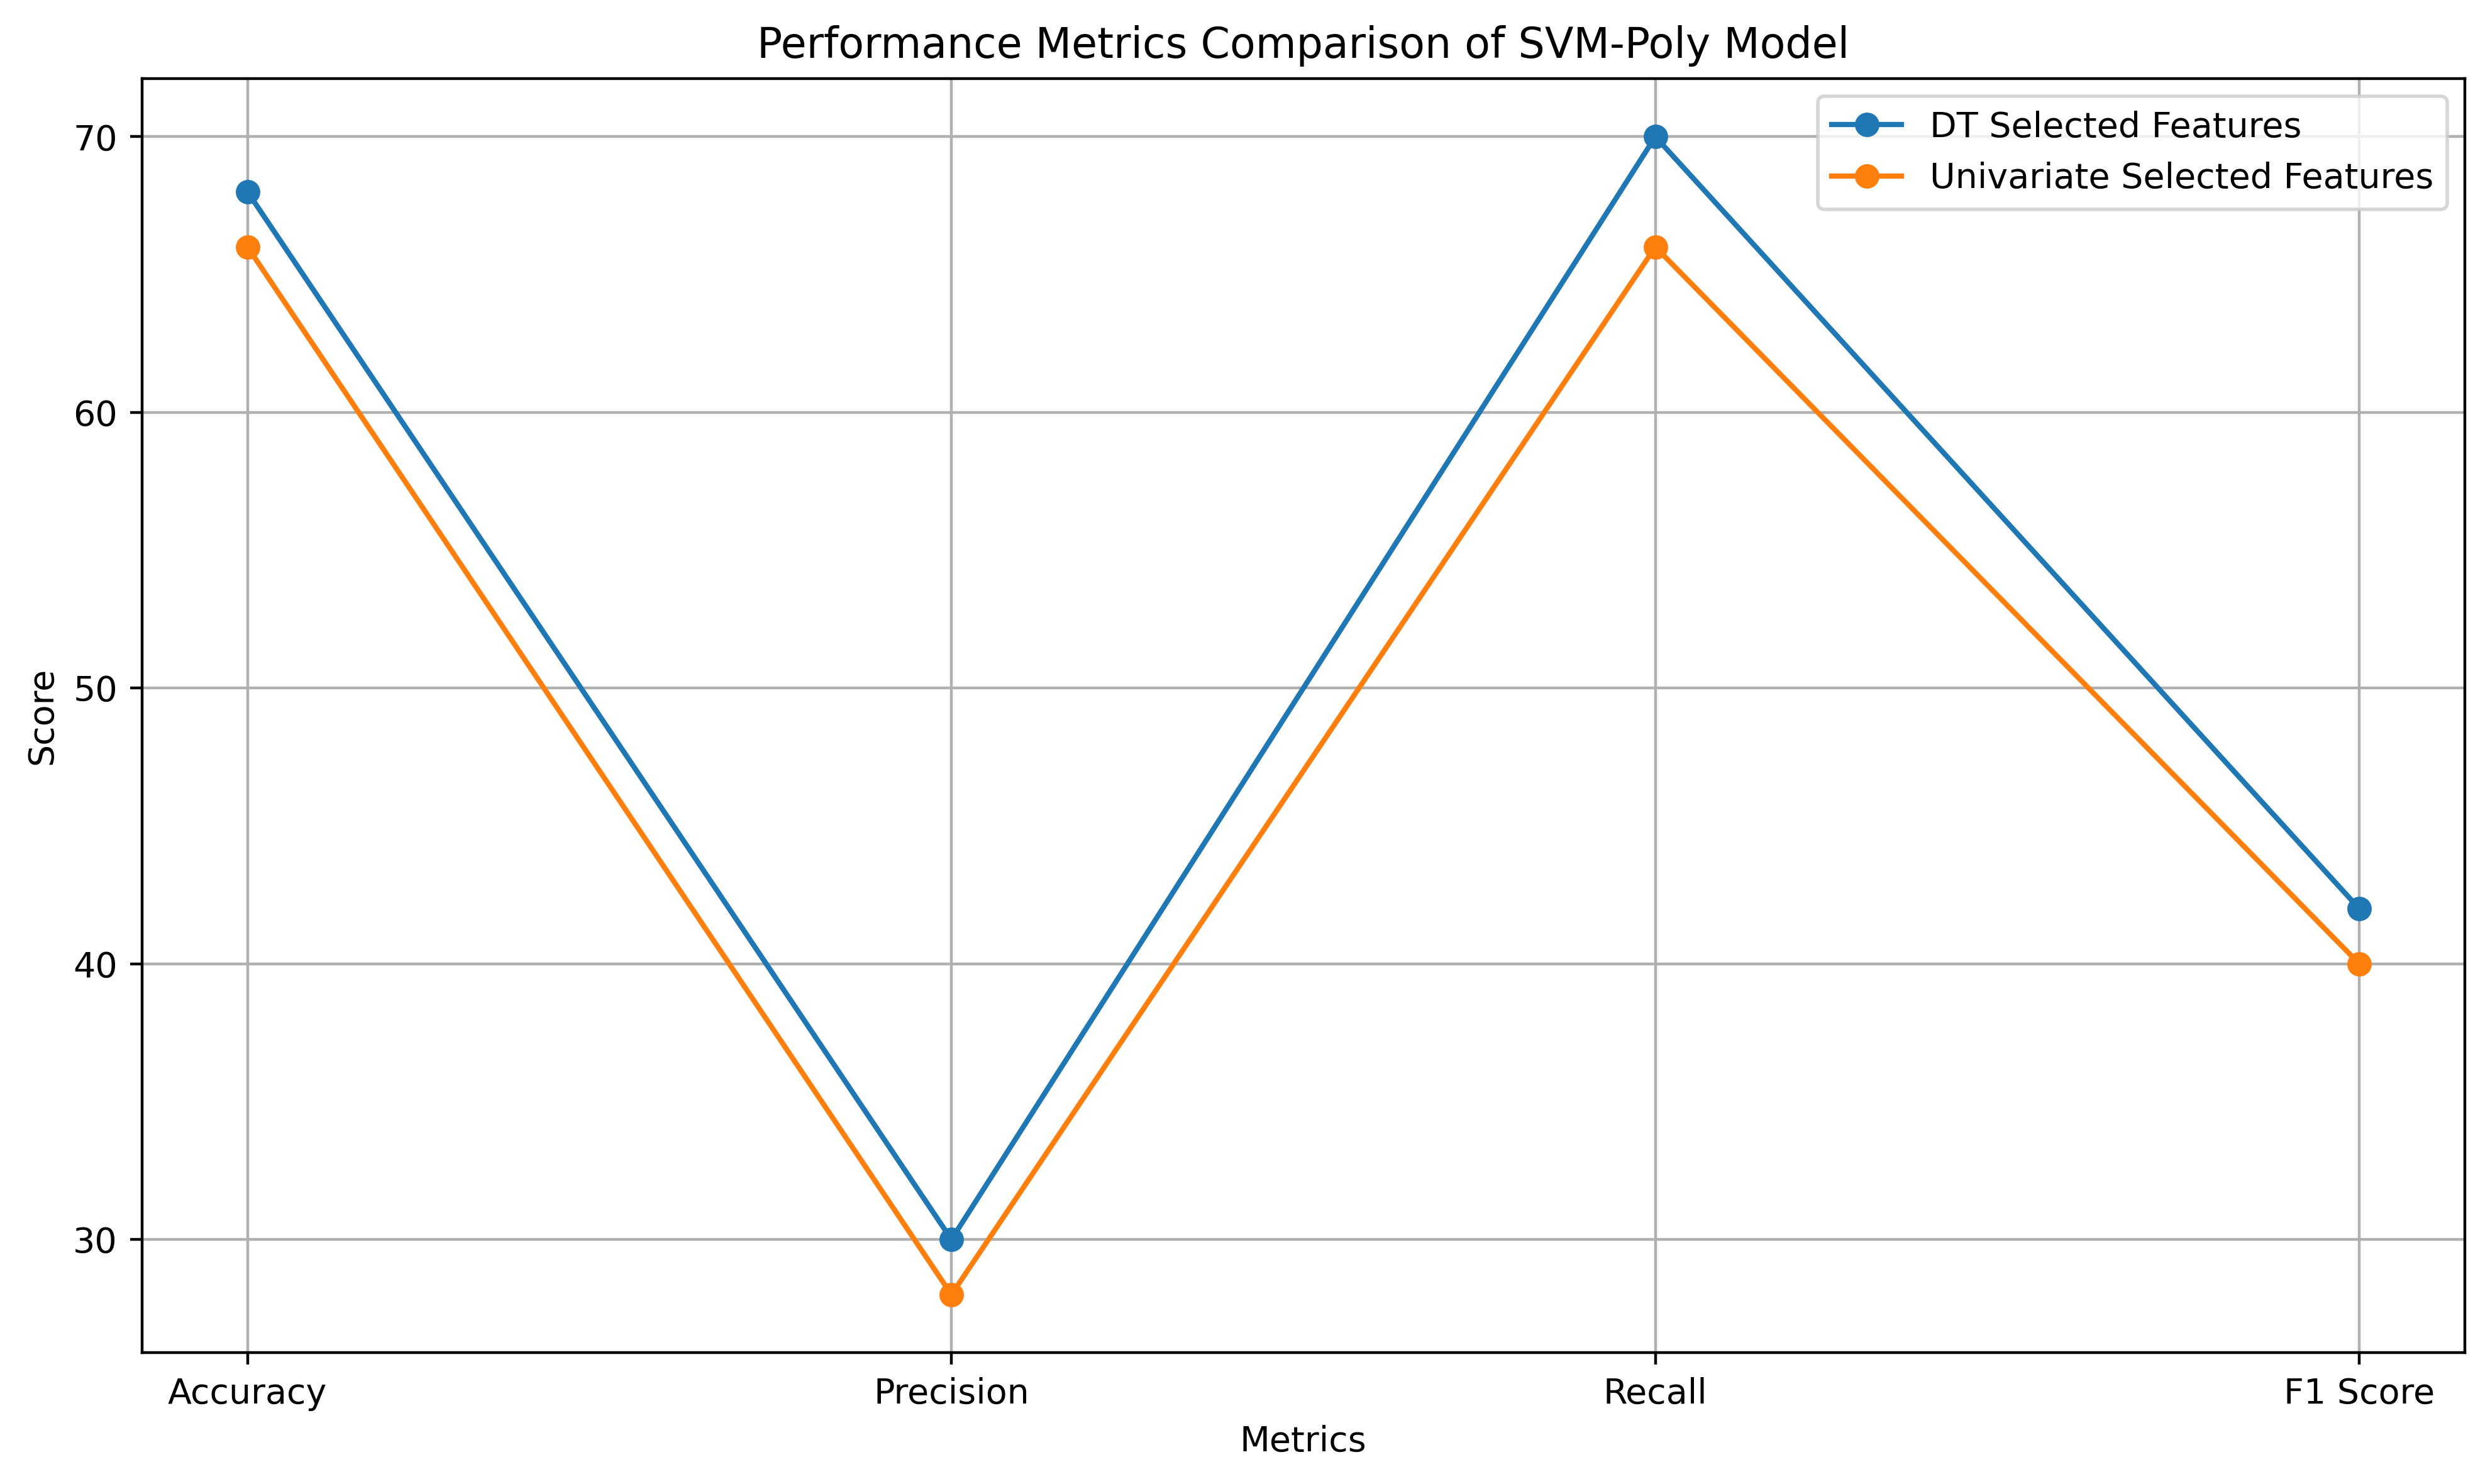

In [ ]:
import matplotlib.pyplot as plt
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
dt_scores = [68,30,70,42]
univar_scores = [66,28,66,40]

x = range(len(labels))

plt.figure(figsize=(10, 6),dpi=400)

plt.plot(x, dt_scores, marker='o', label='DT Selected Features')
plt.plot(x, univar_scores, marker='o', label='Univariate Selected Features')

plt.title('Performance Metrics Comparison of SVM-Poly Model')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.xticks(x, labels)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

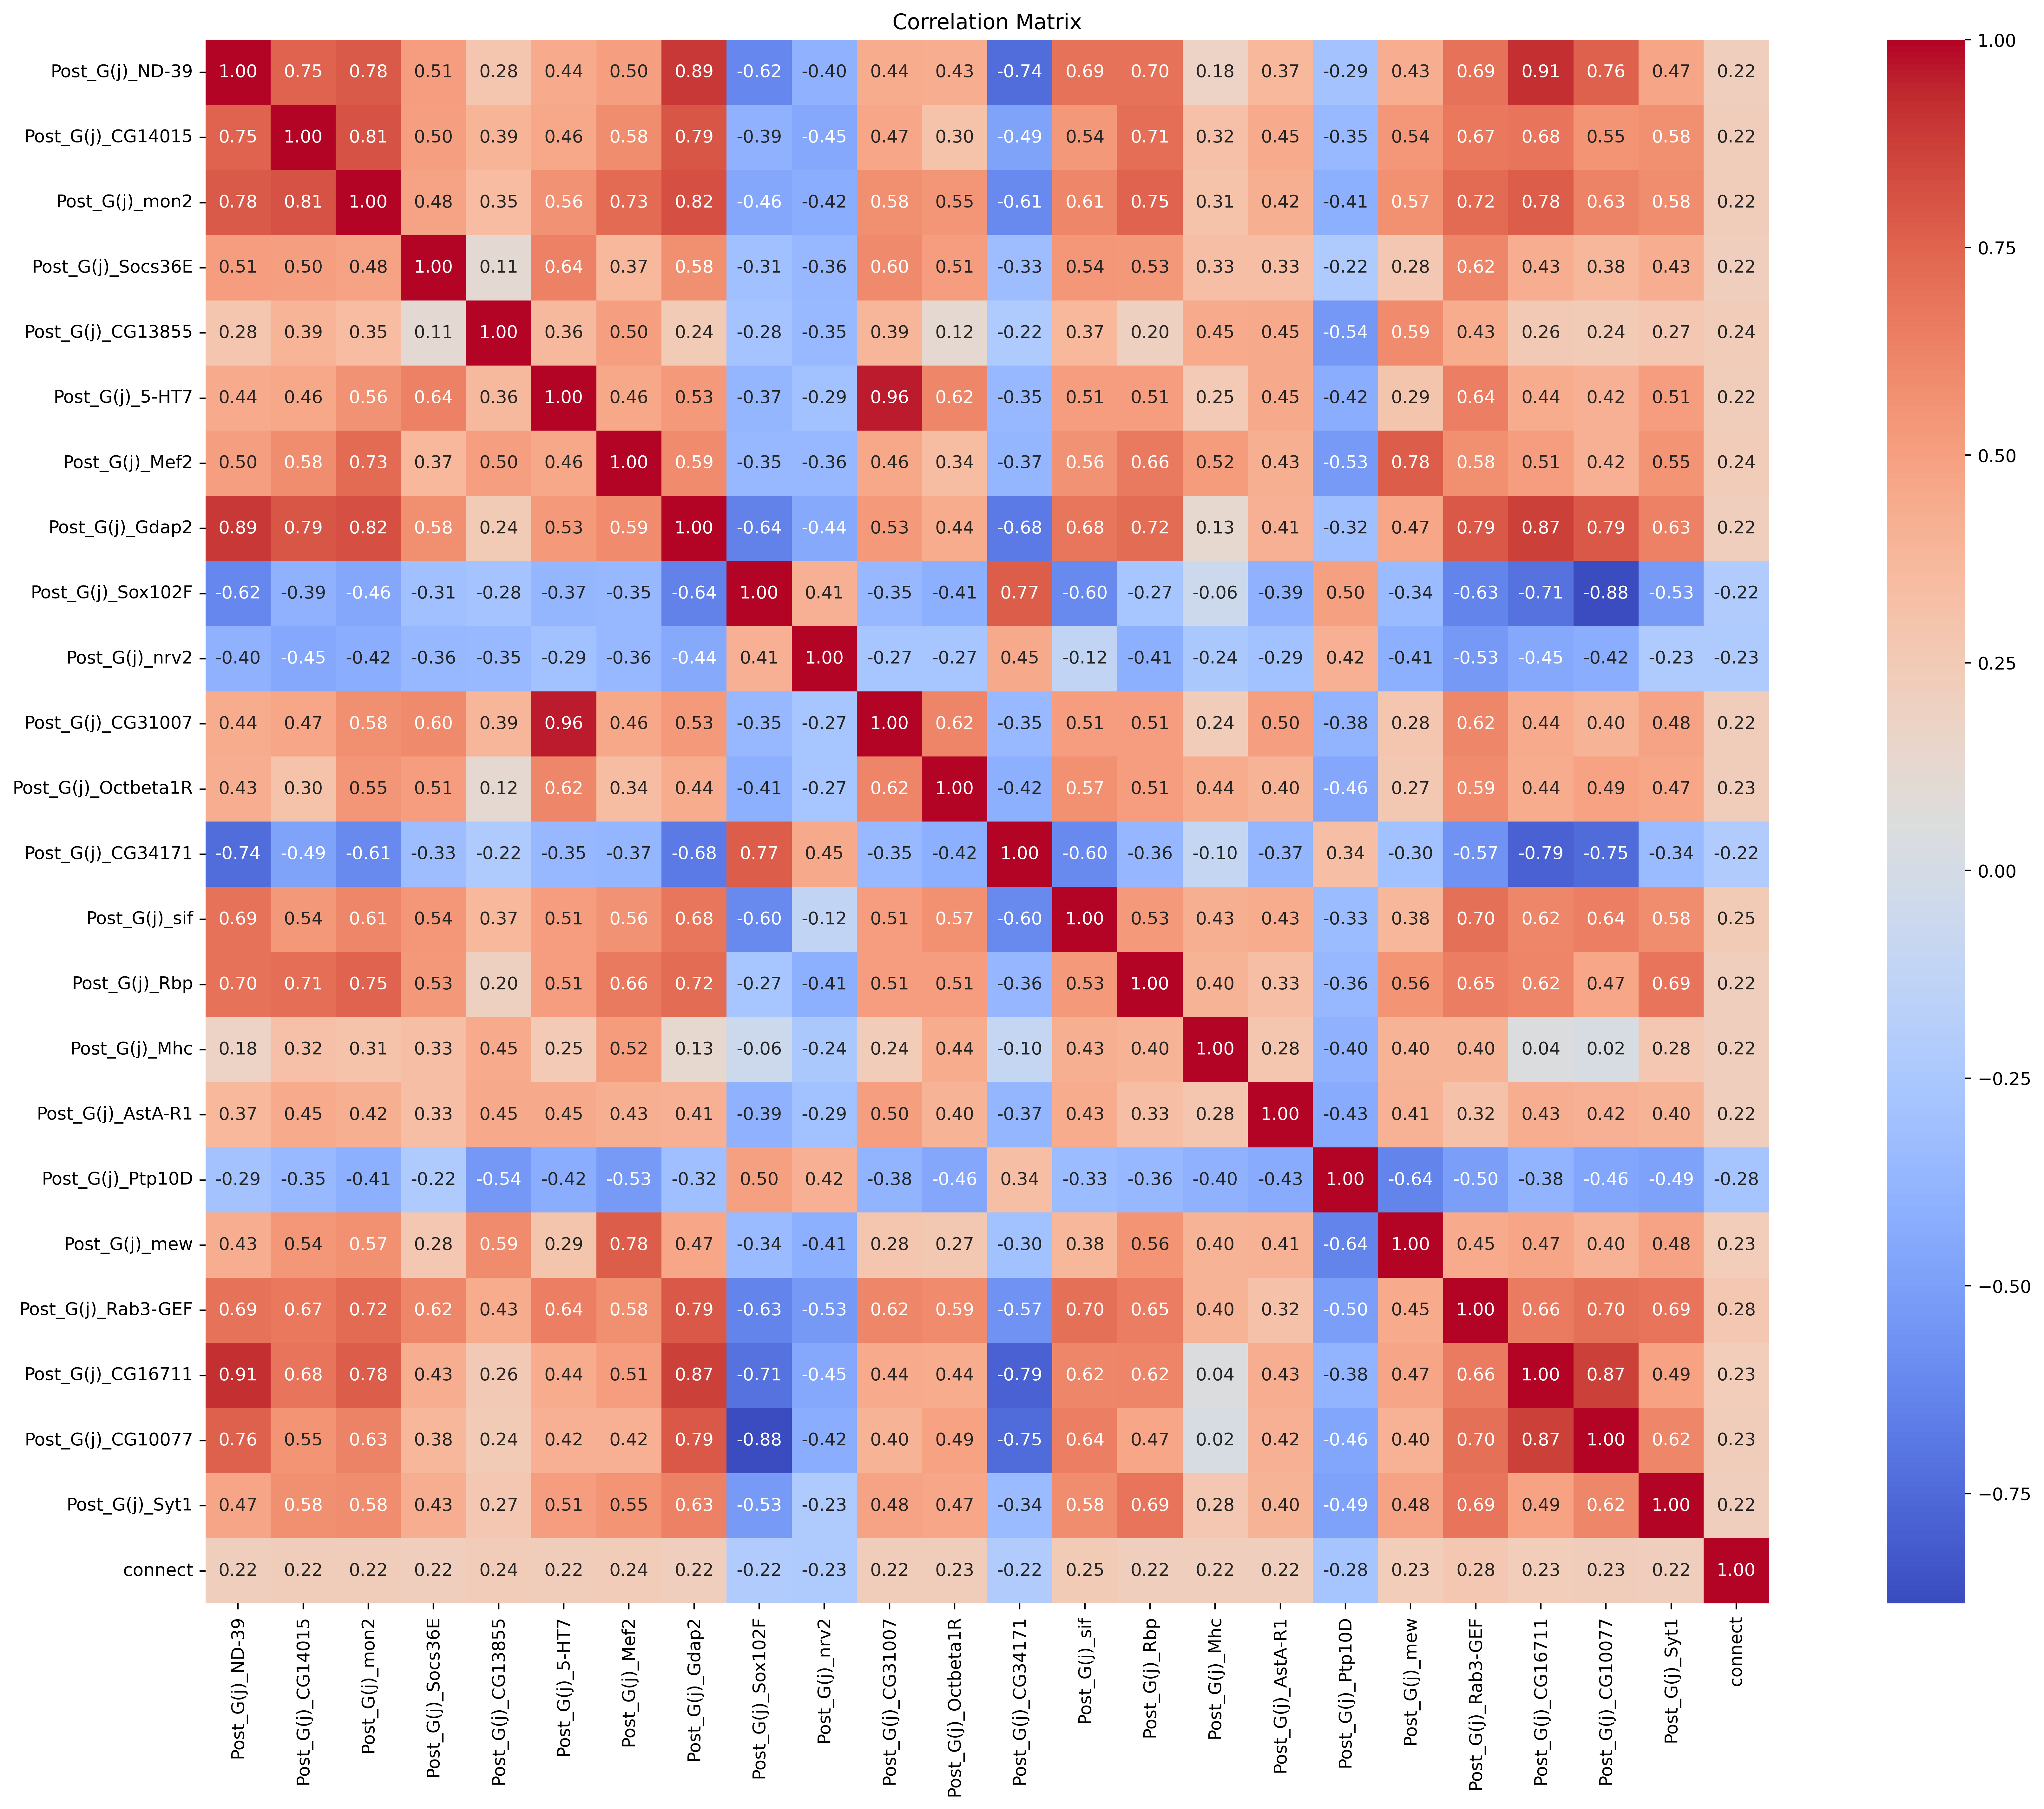

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your dataframe containing your data
# Calculate correlation matrix
correlation_matrix = subset_univar_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(24, 16),dpi=400)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlation_matrix = subset_dt_data.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8),dpi=400)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()